# Linear Models

http://scikit-learn.org/stable/modules/linear_model.html

## 1.1.1. Ordinary Least Squares
손실을 최소로하는 직선 구하기. 각 값의 에러 제곱의 합이 최소가 되는 값

In [2]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) #x = [[0, 0], [1, 1], [2, 2]], y = [0, 1, 2]
#fit( X , y , sample_weight = None )
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
reg.coef_ #coef_는 각 feature에 해당하는 weight. #coefficient
#reg.intercept_로 bias를 구할 수도 있다.

array([ 0.5,  0.5])

## Linear Regression Example

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


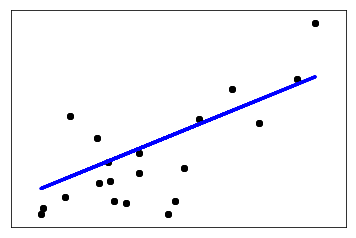

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes() #당뇨병 데이터 셋 불러오기

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2] #각 데이터에서 2번째 인덱스의 값만 추출
# np.newaxis : 새로운 축을 추가한다.

# 축 추가 전 
# array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
#         -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]])
# diabetes.data[:1, 2] : array([ 0.06169621])

# 축 추가 후
# array([[[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
#          -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]]])
# diabetes.data[:1, np.newaxis, 2] : array([[ 0.06169621]])
# []갯수 확인

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] #20개를 뺀 나머지로 트레인
diabetes_X_test = diabetes_X[-20:] #20개로 테스트
#위에서 축을 추가했기에 2차원 배열. 추가하지 않고 그냥 split하면 각 배열이 1차원으로 된다. 
#fit()함수에 맞추기 위해 축을 추가한다.

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20] #20개를 뺀 나머지로 트레인
diabetes_y_test = diabetes.target[-20:] #20개로 테스트

# Create linear regression object
regr = linear_model.LinearRegression() #모델 생성

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train) #train_x, train_y로 모델 학습.
#fit 함수에 맞추기 위해 위에서 축 추가
#fit( X , y , sample_weight = None )

# The coefficients
print('Coefficients: \n', regr.coef_) #가중치 값 출력. input이 하나이기에 여기선 coef_ 반환값도 하나

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
#오차 제곱의 평균.
#regr.predict(diabetes_X_test)의 값으로 예측 값 배열을 받아와 각 정답레이블과의 오차를 구하고 제곱해 평균.

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test)) 
#score(X, y[, sample_weight]) : R2 점수를 반환한다. 1이 max

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black') 
#x축: diabetes_X_test, y축: diabetes_y_test으로 scatter 차트
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)
#x축: diabetes_X_test, y축: regr.predict(diabetes_X_test)으로 line 그리기

plt.xticks(()) #x축 지표 표시 : 빈 칸으로 두면 없앤다. 
plt.yticks(()) #y축 지표 표시 : 빈 칸으로 두면 없앤다.

plt.show()